In [5]:
from utils import CLOVA
from utils import contents_select
from utils import Frontalize
from utils import Lip_motion
from utils import Pronounce
from utils import visualize
from utils import Wave

import warnings
warnings.filterwarnings('ignore')

## Analysis inference

In [2]:
# CLOVA.ClovaSpeechClient().req_upload('./data/system_video.mp4',completion='sync')

In [10]:
filepath = './data/'
videoname = 'system_video'
lst, dialogue = contents_select.contents_select(filepath, videoname, exist=True)
print('학습 가능 영상:', lst)
print('대본:', dialogue)

학습 가능 영상: [0, 1, 2, 3, 4, 5, 7]
대본: [{'start_time': '00:00:03.308', 'speaker_id': '구대영', 'end_time': '00:00:10.542', 'dialogue_id': 4109, 'utterance': '어때? 어? 숯의 불향이 깊게 스며들어서 담백하면서도 겉은 바삭하고 속은 촉촉한 환상의 궁합이'}, {'start_time': '00:00:10.597', 'speaker_id': '백수지', 'end_time': '00:00:14.985', 'dialogue_id': 4108, 'utterance': '하..나 진짜 인정하고 싶지 않은데 이것도 맛있다'}, {'start_time': '00:00:14.799', 'speaker_id': '구대영', 'end_time': '00:00:17.978', 'dialogue_id': 4107, 'utterance': '거봐 어? 내가 왜 식샤님이라고 불리겠어'}, {'start_time': '00:00:18.149', 'speaker_id': '백수지', 'end_time': '00:00:24.758', 'dialogue_id': 4106, 'utterance': '식샤님은 개뿔 이건 삼겹살님의 은혜거든? 역시 삼겹살님은 언제나 옳아'}, {'start_time': '00:00:24.799', 'speaker_id': '구대영', 'end_time': '00:00:31.005', 'dialogue_id': 4105, 'utterance': '그렇게 말하면 여기있는 이 소세지님 어? 채소님 조개님 이거 얼마나 섭섭해 하시겠어 안그래?'}, {'start_time': '00:00:30.828', 'speaker_id': '백수지', 'end_time': '00:00:34.257', 'dialogue_id': 4104, 'utterance': '섭섭하셨어요? 흠 제가 곧 먹어드릴께요'}, {'start_time': '00:00:35.221', 'speake

In [4]:
# filepath = './data/'
# videoname = 'new_video'
# lst, object = contents_select.contents_select(filepath, videoname, exist=False)
# print('학습 가능 영상:', lst)
# print('대본:', object)

In [5]:
lets_study, lets_study_lip_lst = contents_select.create_study_dir(videoname, lst, dialogue=dialogue, object=None, exist=True)
print('최종 학습 가능 목록:', lets_study)
print('학습 가능 영상 입술 좌표:', lets_study_lip_lst)

Directory is already existed
Directory is already existed
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
0번째 영상 확인을 시작합니다.
0번 영상의 ./data/Study_Dir/0th_Study_Dir\130.jpg은 입술 좌표 추출이 불가합니다.
Directory is already existed
Directory is already existed
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
1번째 영상 확인을 시작합니다.
1번 영상의 ./data/Study_Dir/1th_Study_Dir\82.jpg은 입술 좌표 추출이 불가합니다.
Directory is already existed
Directory is already existed
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
2번째 영상 확인을 시작합니다.
2번 영상의 ./data/Study_Dir/2th_Study_Dir\64.jpg은 입술 좌표 추출이 불가합니다.
Directory is already existed
Directory is already existed
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
3번째 영상 확인을 시작합니다.
3번 영상은 Let's study 학습 자료로 활용 가능합니다.
Directory is already existed
Directory is already existed
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
4번째 영상 확인을 시작합니다.
4번 영상의 ./data/Study_Dir/4th_Study_Dir\83.jpg은 입술 

In [ ]:
lets_study = [3, 5]

In [ ]:
target_name = 'user_video'
# video_index = int(input('Select Directory want to study in lets_stduy lst'))
video_index = 0
selected_dir = f'./data/Study_Dir/{lets_study[video_index]}th_Study_Dir'

In [8]:
Lip_motion.make_target_dir(target_name, selected_dir)

Directory is already existed


In [ ]:
dir_lst = lets_study
target_dir = './data/test'
Lip_motion.lip_motion_analysis(video_index, target_dir, dir_lst)

Directory is already existed
Frames are already existed
원본 영상과 학습자 영상의 프레임 수가 일치합니다.
입술 분석 결과: 2625.662002880012


2625.662002880012

In [4]:
filepath = './data/'
videoname_2 = 'user_video'
Wave.make_wave_file('3th_video', './data/Study_Dir/3th_Study_Dir/')
Wave.make_wave_file(videoname=videoname_2, directory=filepath)

Directory is already existed
Directory is already existed


exporting ./data/Audio/out_audio_system.wav
exporting ./data/Audio/out_audio_user.wav


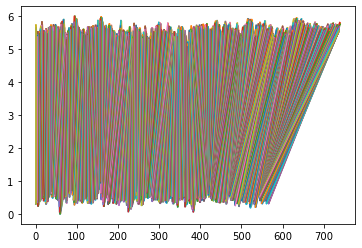

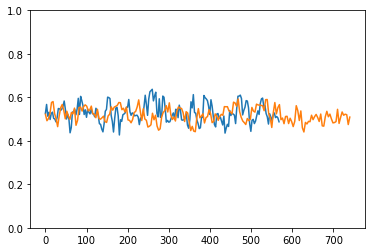

54.673667093882194

In [5]:
source = './data/Audio/3th_video.wav'
target = './data/Audio/user_video.wav'
export_dir = './data/Audio/'
Wave.MFCC(source, target, export_dir)

In [6]:
api_system = './data/Audio/api_system_audio.wav'
api_user = './data/Audio/api_user_audio.wav'

In [7]:
score, sys_text, user_text = Pronounce.text_recognition(api_system, api_user)
score, sys_text, user_text

(0.984375,
 '식한님은 갯불 이건 삼겹살님의 은혜거든 역시 삼겹살님은 언제나 오라',
 '6시 님은 갯불 이건 삼겹살 님의 은혜거든 역시 삼겹살 님은 언제나 오라')

In [8]:
audioFilePath = './data/Audio/pronoun.wav'

In [9]:
Pronounce.prounce_score(audioFilePath, sys_text)

original wav sr: 22050, original wav shape: (234212,), resample wav sr: 16000, resmaple shape: (169950,)


'{"result":0,"return_object":{"recognized":"식한님은 갯불 이건 삼겹살님의 은혜거든 역시 삼겹살님은 언제나 오라","score":2.8336288928985596}}'

## Model inference

In [3]:
from utils import T5
import warnings
warnings.filterwarnings('ignore')

In [4]:
T5.sentence_generate('식샤님은 개뿔 이건 삽겹살님의 은혜거든 역시 삼겹살님은 언제나 옳아')

'식샤님은 어때?'

In [1]:
from utils import Timesformer

c:\Users\lucky\anaconda3\envs\DYKK\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


No CUDA runtime is found, using CUDA_HOME='C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.3'


ImportError: DLL load failed while importing _ext: 지정된 모듈을 찾을 수 없습니다.

In [1]:
from utils import koBERT

ModuleNotFoundError: No module named 'kobert'